In [1]:
# EDA e Visualizacao de Dados
import pandas as pd
import plotly.express as px
import seaborn as sns

# ML / T-sne
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.manifold import TSNE

# Carregar os dados

In [2]:
# Carregar dataframe
df_cosmeticos = pd.read_csv('datasets/cosmeticos.csv')

In [3]:
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [4]:
# Visualizar os primeiros registros
df_cosmeticos.head(10)

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


In [5]:
# Visualizar os ultimos registros
df_cosmeticos.tail(10)

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
1462,Sun protect,COOLA,Summer Duo,36,4.8,Visit the COOLA boutique,0,0,0,0,0
1463,Sun protect,VITA LIBERATA,Passionflower & Argan Dry Oil Broad Spectrum S...,45,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil*, C...",0,0,0,0,0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1
1465,Sun protect,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,34,4.1,-Pepha® (derived from watermelon extract): Pro...,0,0,0,0,0
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


# EDA

## Transformar os valores da coluna "ingredientes" em um novo dataframe

In [6]:
df_cosmeticos_eda = df_cosmeticos.copy()
df_cosmeticos_eda = df_cosmeticos_eda['Ingredientes'].str.split(',')

In [7]:
df_cosmeticos_eda

0       [Algae (Seaweed) Extract,  Mineral Oil,  Petro...
1       [Galactomyces Ferment Filtrate (Pitera),  Buty...
2       [Water,  Dicaprylyl Carbonate,  Glycerin,  Cet...
3       [Algae (Seaweed) Extract,  Cyclopentasiloxane,...
4       [Water,  Snail Secretion Filtrate,  Phenyl Tri...
                              ...                        
1467    [Water,  Alcohol Denat.,  Potassium Cetyl Phos...
1468    [Water,  Isododecane,  Dimethicone,  Butylocty...
1469    [Water,  Dihydroxyacetone,  Glycerin,  Scleroc...
1470    [Water,  Dihydroxyacetone,  Propylene Glycol, ...
1471                      [Visit the DERMAFLASH boutique]
Name: Ingredientes, Length: 1472, dtype: object

In [8]:
df_ingredientes = df_cosmeticos_eda.explode('Ingredientes')

In [9]:
df_ingredientes

0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                     ...              
45811           Alpha-isomethyl Ionone
45812                 CI 14700 (Red 4)
45813              CI 19140 (Yellow 5)
45814               CI 42090 (Blue 1).
45815    Visit the DERMAFLASH boutique
Name: Ingredientes, Length: 45816, dtype: object

## Análise Univariada

In [10]:
# Estatísticas das variaveis
df_cosmeticos.describe()

,Preco,Rating,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Distribuição da variável Tipo
percentual_tipo = df_cosmeticos['Tipo'].value_counts(normalize=True) * 100
percentual_tipo = percentual_tipo.reset_index()
percentual_tipo.columns = ['Tipo', 'Percentual']
fig_tipo = px.bar(percentual_tipo, x='Tipo', y='Percentual', title='Distribuição da Variável Tipo', color='Tipo', text='Percentual')
fig_tipo.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
fig_tipo.show()

In [21]:
# Distribuição da variável Marca
percentual_marca = df_cosmeticos['Marca'].value_counts(normalize=True) * 100
percentual_marca = percentual_marca.reset_index()
percentual_marca.columns = ['Marca', 'Percentual']
fig_tipo = px.bar(percentual_marca.head(10), x='Percentual', y='Marca', title='Distribuição da Variável Tipo', color='Marca', text='Percentual', orientation='h')
fig_tipo.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
fig_tipo.show()

In [22]:
# Quantidade de Marcas
df_cosmeticos['Marca'].nunique()

116

In [25]:
# Distribuição da variável Ingrediente
percentual_ingrediente = df_ingredientes.value_counts('Ingredientes') / len(df_ingredientes) * 100
percentual_ingrediente = percentual_ingrediente.reset_index()
percentual_ingrediente.columns = ['Ingrediente', 'Percentual']
fig = px.bar(percentual_ingrediente.head(10), x='Percentual', y='Ingrediente', color='Ingrediente', text='Percentual' ,orientation='h')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')

fig.show()

In [26]:
df_ingredientes.nunique()

7298

In [29]:
# Distribuição da variável Preco
px.histogram(df_cosmeticos['Preco'], title='Hisogragrama da Variável Preço')

In [30]:
# Distribuição da variável Rating
px.histogram(df_cosmeticos['Rating'], title='Histograma da variável Rating')

## Análise Bivariada

In [31]:
# Plot de Distribuição (BoxPlot) por Tipo e Preço
px.box(df_cosmeticos, x='Preco', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [32]:
# Plot de Distribuição (BoxPlot) por Tipo e Rating
px.box(df_cosmeticos, x='Rating', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [33]:
# Correlação Preço e Rating
px.scatter(df_cosmeticos, x='Preco', y='Rating', color='Tipo', hover_data=['Marca'])

### Matriz de Correlação

In [36]:
# Gerar Matriz de Correlação
matriz_correlacao_cosmeticos = df_cosmeticos.corr(numeric_only=True)

<Axes: >

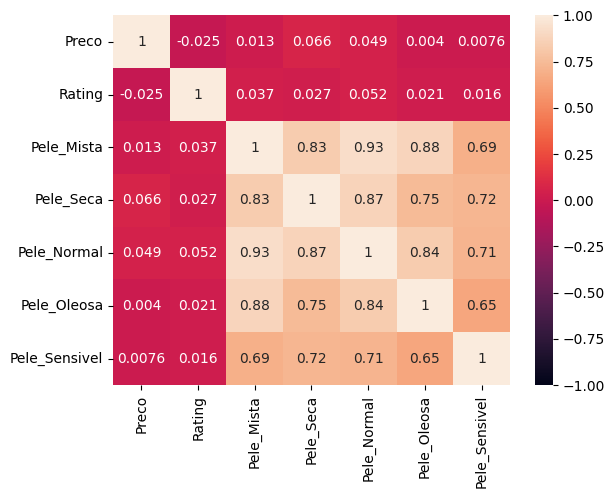

In [37]:
# Plotar matriz de correlação
sns.heatmap(matriz_correlacao_cosmeticos, vmin=-1, vmax=1, annot=True)